In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
import QuantumPartonShower_clean as qpsc
import plotting as pl
import matplotlib

from PaperPlots import MakeObservables as mo

Number of emissions:  1
log(theta_max):  (-5.180816459236603, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  2
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-3.4538776394910684, array([-5.75646273, -3.45387764, -1.15129255]), array([-6.90775528, -4.60517019, -2.30258509,  0.        ]))


## Count gate costs of the old circuits (pre-remeasurement)

In [217]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

#shots= 10000

N= 10

cx_naive= np.zeros(N-1)
for n in range(1, N):
    qps1= qps.QuantumPartonShower(n, 1)
    qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

    #qcT= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 1)

    print('Qubits: ' + str(qc.num_qubits))
    print('Clbits: ' + str(qc.num_clbits))
    print('Gates: ' + str(qc.count_ops()))
    #print('Transpiled Gates: ' + str(qcT.count_ops()))
    #print(qcT.count_ops()['cx'])
    #cx_naive[n]= qcT.count_ops()['cx']
    ops= qc.count_ops()
    cx_naive[n-1]= int(ops['cx'] + 6*ops['ccx'] + ops['ch'] + 2*ops['cry']) 
    print(cx_naive[n-1])
    
np.save('cx_naive', cx_naive)


m= 0
k:  0
generated circuit on 11 qubits
Qubits: 28
Clbits: 0
Gates: OrderedDict([('ccx', 149), ('x', 132), ('cry', 17), ('cx', 7), ('ch', 1)])
936.0

m= 0
k:  0

m= 1
k:  0
k:  1
generated circuit on 11 qubits
Qubits: 33
Clbits: 0
Gates: OrderedDict([('ccx', 1105), ('x', 973), ('cry', 75), ('cx', 20), ('ch', 3)])
6803.0

m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2
generated circuit on 11 qubits
Qubits: 48
Clbits: 0
Gates: OrderedDict([('ccx', 3376), ('x', 2962), ('cry', 208), ('cx', 63), ('ch', 6)])
20741.0

m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2

m= 3
k:  0
k:  1
k:  2
k:  3
generated circuit on 11 qubits
Qubits: 54
Clbits: 0
Gates: OrderedDict([('ccx', 10016), ('x', 8583), ('cry', 466), ('cx', 148), ('ch', 10)])
61186.0

m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2

m= 3
k:  0
k:  1
k:  2
k:  3

m= 4
k:  0
k:  1
k:  2
k:  3
k:  4
generated circuit on 11 qubits
Qubits: 60
Clbits: 0
Gates: OrderedDict([('ccx', 21851), ('x', 18420), ('cry', 918), ('cx',

## Count gate costs of the hacked remeasurment circuit (e.g. with combinatorial number of classical controls)

In [229]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

#shots= 10000

N= 7

cx_hack= np.zeros(N-1)
for n in range(1, N):
    qps1= qpsc.QuantumPartonShower(n, 1)
    qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

    #qcT= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 1)

    print('Qubits: ' + str(qc.num_qubits))
    print('Clbits: ' + str(qc.num_clbits))
    print('Gates: ' + str(qc.count_ops()))
    #print('Transpiled Gates: ' + str(qcT.count_ops()))
    #print(qcT.count_ops()['cx'])
    #cx_hack[n]= qcT.count_ops()['cx']
    ops= qc.count_ops()
    cx_hack[n-1]= int(ops['cx'] + 6*ops['ccx'] + ops['ch'] + 2*ops['cry']) 
    print(cx_hack[n-1])
    
np.save('cx_hack', cx_hack)



m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(6, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 16
Clbits: 16
Gates: OrderedDict([('ccx', 53), ('x', 52), ('cry', 13), ('cx', 11), ('measure', 2), ('reset', 2), ('ch', 1)])
356.0


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(9, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 19
Clbits: 21
Gates: OrderedDict([('ccx', 278), ('x', 259), ('cry', 46), ('cx', 40), ('measure', 4), ('reset', 4), ('ch', 4)])
1804.0


m= 0


Ap

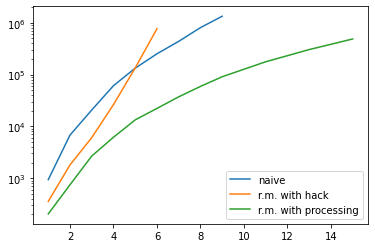

In [242]:
#plt.plot(np.arange(1, 10), np.log2(np.load('cx_naive.npy')), label= 'naive')
#plt.plot(np.arange(1, 7), np.log2(np.load('cx_hack.npy')), label= 'r.m. with hack')
#plt.plot(np.arange(1, 16), np.log2(total), label= 'r.m. with processing')

plt.plot(np.arange(1, 10), np.load('cx_naive.npy'), label= 'naive')
plt.plot(np.arange(1, 7), np.load('cx_hack.npy'), label= 'r.m. with hack')
plt.plot(np.arange(1, 16), total, label= 'r.m. with processing')
plt.yscale('log')

plt.legend()
plt.show()

In [38]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            print(qubit)

Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_

<ipython-input-38-fe12c1589137>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


In [47]:
import QuantumPartonShower_single_hRegcl_repackaged as ayo

simulator = Aer.get_backend('qasm_simulator')

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

shots= 10

qps1= ayo.QuantumPartonShower(2, 1)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
qcT1= compiler.transpile(qc1, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)

print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
print('Transpiled Gates: ' + str(qcT.count_ops()))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
None
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]
1


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
[0]
		n_tot, n_phi= 2, 1
[1]
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
4
5
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']

In [48]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    print(data[j])
    #for qubit in data[j][1]:
        #if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            #print(qubit)

(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe34a9d5820>, [Qubit(QuantumRegister(9, 'p'), 2)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe3495da400>, [Qubit(QuantumRegister(9, 'p'), 2), Qubit(QuantumRegister(9, 'p'), 0)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe3495dac10>, [Qubit(QuantumRegister(9, 'p'), 5), Qubit(QuantumRegister(9, 'p'), 3)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe34aee2a60>, [Qubit(QuantumRegister(9, 'p'), 8), Qubit(QuantumRegister(9, 'p'), 6)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe3478a1bb0>, [Qubit(QuantumRegister(9, 'p'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe3478a1af0>, [Qubit(QuantumRegister(9, 'p'), 0), Qubit(QuantumRegister(9, 'p'), 2), Qubit(QuantumRegister(3, 'w'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe3478a19d0>, [Qubit(QuantumRegister(9, 'p'), 0)], [])
(<

In [46]:
qc.draw()

┌───┐               »
    w_0: ─────────────────────────────────────────────┤ X ├───────■───────»
                                                      └─┬─┘       │       »
    w_1: ───────────────────────────────────────────────┼─────────┼───────»
                                                        │         │       »
    w_2: ───────────────────────────────────────────────┼─────────┼───────»
                        ┌─────────────┐     ┌───┐       │  ┌───┐  │  ┌───┐»
    p_0: ───────────────┤ Ry(-1.1071) ├─────┤ X ├───────■──┤ X ├──┼──┤ X ├»
              ┌───┐     └──────┬──────┘     └───┘       │  └───┘  │  └───┘»
    p_1: ─────┤ X ├────────────┼────────────────────────┼─────────┼───────»
              ├───┤            │                        │         │       »
    p_2: ─────┤ X ├────────────■────────────────────────■─────────┼───────»
         ┌────┴───┴────┐                                          │       »
    p_3: ┤ Ry(-1.1071) ├──────────────────────────────────────────┼───────»
         └──────┬──────┘                                          │       »
    p_4: ───────┼─────────────────────────────────────────────────┼───────»
                │                                                 │       »
    p_5: ───────■─────────────────────────────────────────────────┼───────»
         ┌─────────────┐ ┌────────────┐┌─────────────┐            │       »
    p_6: ┤ Ry(-1.1071) ├─┤ Ry(1.1071) ├┤ Ry(-1.1071) ├────────────┼───────»
         └──────┬──────┘ └─────┬──────┘└──────┬──────┘            │       »
    p_7: ───────┼──────────────┼──────────────┼───────────────────┼───────»
                │              │              │                   │       »
    p_8: ───────■──────────────■──────────────■───────────────────┼───────»
                                                                  │       »
    h_0: ─────────────────────────────────────────────────────────┼───────»
                              ┌─┐                                 │       »
    h_1: ─────────────────────┤M├────────────|0>──────────────────┼───────»
                              └╥┘                                 │       »
    e_0: ──────────────────────╫──────────────────────────────────┼───────»
                               ║                                ┌─┴─┐┌───┐»
  n_a_0: ──────────────────────╫────────────────────────────────┤ X ├┤ X ├»
              ┌───┐            ║            ┌───┐     ┌───┐     └───┘└───┘»
  n_a_1: ─────┤ X ├────────────╫────────────┤ X ├─────┤ X ├───────────────»
              └───┘            ║            └───┘     └───┘               »
  w_h_0: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_h_1: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_a_0: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_a_1: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
 w_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p0_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p1_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p2_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
 h_cl: 4/══════════════════════╩══════════════════════════════════════════»
                               1                                          »
 e_cl: 1/═════════════════

In [143]:
def qubit_count_new(N, ni):
    return int(3*(N+ni) + 4*math.floor(math.log2(N+ni)) + 6)
    
def qubit_count_old(N, ni):
    return int(3*(N+ni) + (N+7)*math.floor(math.log2(N+ni)) + N + 9)


 N: 1
old: 24
new: 16
28

 N: 2
old: 29
new: 19
33

 N: 3
old: 44
new: 26
48

 N: 4
old: 50
new: 29
54

 N: 5
old: 56
new: 32
60

 N: 6
old: 62
new: 35
66

 N: 7
old: 82
new: 42
86

 N: 8
old: 89
new: 45
93

 N: 9
old: 96
new: 48
100

 N: 10
old: 103
new: 51
107

 N: 11
old: 110
new: 54
114

 N: 12
old: 117
new: 57
121


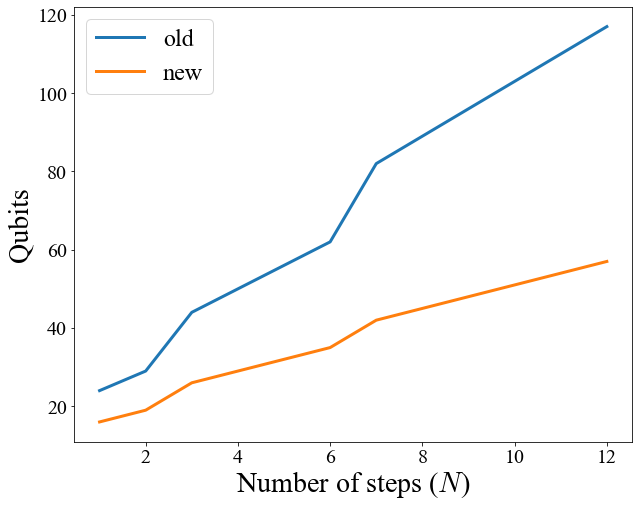

In [175]:
ni= 1

Nmax= 12
old_qubits= np.arange(Nmax)
new_qubits= np.arange(Nmax)

for N in range(1, Nmax+1):
    print('\n N: %d' %(N))
    print('old: ' + str(qubit_count_old(N, ni)))
    print('new: ' + str(qubit_count_new(N, ni)))
    old_qubits[N-1]= qubit_count_old(N, ni)
    new_qubits[N-1]= qubit_count_new(N, ni)
    
    qc1= qps.QuantumPartonShower(N, 1)
    print(qc1._circuit.num_qubits)
    

plt.figure(figsize=(10, 8))
plt.rcParams['mathtext.fontset'] = 'cm'

plt.plot(np.arange(1, Nmax+1, 1), old_qubits, linewidth= 3, label='old')
plt.plot(np.arange(1, Nmax+1, 1), new_qubits, linewidth= 3, label='new')
plt.legend(prop=matplotlib.font_manager.FontProperties(family='times new roman', size= 24))

plt.xlabel('Number of steps ($N$)', fontname= 'times new roman', fontsize= 28)
plt.ylabel('Qubits', fontname= 'times new roman', fontsize= 28)
plt.xticks(size= 20, fontname= 'times new roman')
plt.yticks(size= 20, fontname= 'times new roman')
#plt.title('Qubits', fontsize= 32, pad= 20)
plt.savefig('qubits_old_new.pdf')
plt.show()

In [212]:
def grayList(L):
    if L == 1:
        return np.ones(1)
    else:
        return np.concatenate((grayList(L-1), np.ones(1), 1 + grayList(L-1)), 0)

    
    
def gate_counter_TLCry(L, k):
    glk= grayList(L)[k-1]
    return 14 + 12*(2*glk - 1)*(L - 2) + 2*(glk - 1)
    
    
    

def gate_counter(n_i, N):
    count_uCount= 0
    count_Ue= 0
    count_Uh= 0
    count_Up= 0
    
    for m in range(0, N):
        
        #print('\n')
        L= int(math.floor(math.log2(n_i + m)) + 1)
        #print(L)
        
        nf= n_i + m - 1 + int(m % 2 == 0)
        #print(nf)
        #if m % 2 == 0:
        #    nf= n_i + m
        #else:
        #    nf= n_i + m - 1
        
        # uCount
        if L == 1:
            count_uCount+= 13
        else:
            count_uCount+= (42*(L - 2)  + 31) * (n_i + m)

        # Ue
        count_Ue+= (12*L - 10) * (nf + 1)
        
        # Uh
        count_Uh+= 12*L - 11
        for k in range(1, n_i + m + 1):
            lk= int(math.floor(math.log2(k)) + 1)

            count_Uh+= 12 + nf*(120 + 12*lk + 3*gate_counter_TLCry(L, k))
            
            if lk >= 2:
                count_Uh+= 42*(lk - 2) + 19
            else:
                count_Uh+= 1
        
        count_Uh= int(count_Uh)


        # Up
        count_Up+= 35
        

    return count_uCount, count_Ue, count_Uh, count_Up

In [214]:
for j in range(2, 10):
    print(gate_counter(1, j))

(75, 32, 569, 70)
(168, 88, 2313, 105)
(460, 192, 5384, 140)
(825, 348, 12020, 175)
(1263, 504, 20289, 210)
(1774, 712, 34541, 245)
(2694, 1016, 55178, 280)
(3729, 1396, 85566, 315)
[2.04000e+02 7.46000e+02 2.67400e+03 6.17600e+03 1.33680e+04 2.22660e+04
 3.72720e+04 5.91680e+04 9.10060e+04 1.26962e+05 1.77102e+05 2.32224e+05
 3.04722e+05 3.85016e+05 4.88428e+05]


[2.04000e+02 7.46000e+02 2.67400e+03 6.17600e+03 1.33680e+04 2.22660e+04
 3.72720e+04 5.91680e+04 9.10060e+04 1.26962e+05 1.77102e+05 2.32224e+05
 3.04722e+05 3.85016e+05 4.88428e+05]


NameError: name 'cx_naive' is not defined

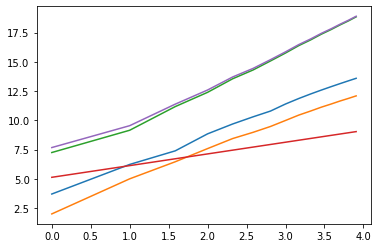

In [215]:
N= 16
Narray= np.arange(1, N)
uCount= np.zeros(N-1)
Ue= np.zeros(N-1)
Uh= np.zeros(N-1)
Up= np.zeros(N-1)

for j in range(1, N):
    uCount[j-1], Ue[j-1], Uh[j-1], Up[j-1]= gate_counter(1, j)
    
total= uCount + Ue + Uh + Up
print(total)

plt.plot(np.log2(Narray), np.log2(uCount), label='uCount')
plt.plot(np.log2(Narray), np.log2(Ue), label='Ue')
plt.plot(np.log2(Narray), np.log2(Uh), label='Uh')
plt.plot(np.log2(Narray), np.log2(Up), label='Up')
plt.plot(np.log2(Narray), np.log2(total), label='Total')
plt.plot(np.log2(Narray[:9]), np.log2(cx_naive[:9]), label='Without remeasurement')

dx= (np.log2(Narray)[-1] - np.log2(Narray)[0])
print('uCount slope: %.5f' %((np.log2(uCount)[-1] - np.log2(uCount)[0]) / dx))
print('Ue slope: %.5f' %((np.log2(Ue)[-1] - np.log2(Ue)[0]) / (np.log2(Narray)[-1] - np.log2(Narray)[0])))
print('Uh slope: %.5f' %((np.log2(Uh)[-1] - np.log2(Uh)[0]) / dx))
print('Up slope: %.5f' %((np.log2(Up)[-1] - np.log2(Up)[0]) / dx))
print('Total slope: %.5f' %((np.log2(total)[-1] - np.log2(total)[0]) / dx))
print('No remeasurement slope: %.5f' %((np.log2(cx_naive)[8] - np.log2(cx_naive)[0]) / np.log2(Narray)[8] - np.log2(Narray)[0]))

plt.xlabel('log(N)')
plt.ylabel('log(# CX)')
plt.legend()

print(cx_naive)

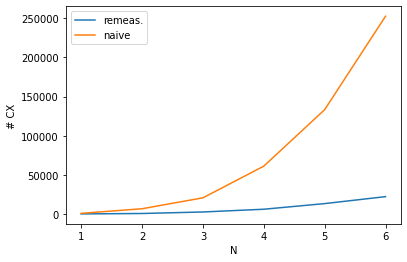

In [90]:
# Total gates counts:

total= uCount + Ue + Uh + Up

plt.plot(Narray[:6], total[:6], label='remeas.')
plt.plot(Narray[:6], cx_naive[:6], label='naive')
plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()

## Fitting

popt: [   23399.06410169  -465633.71238292  -382870.58942532  1730698.54684091
   718343.03661609 -4982445.84077917   723013.21996588  3251946.64909351]

stddev: [  18496.55405986  418064.85775109  309029.70512874 1421319.20797233
  813061.1195825  4619159.3087709   744376.01698575 3203383.32023681]

poptG: [  0.87977559  22.15648621  27.52984964 170.75409864]

stddevG: [ 16.0258347  135.61614826  97.65698193 277.70456804]

poptG2: [54.79782586  2.11767911  0.47662797]

stddevG2: [8.97010562 0.24601116 0.60404658]

poptG2X: [1.18902617e+02 3.24536449e+00 1.37797675e-07]

stddevG2X: [36.79042164  0.13785797  0.40086839]

popt2: [  192.15548738  -874.12213934  2431.06453091 -1834.75396912]

stddev2: [   6.45936067  156.88211839 1098.34355612 2096.81518861]

popt3: [  31756.95711263 -124233.39004063]

stddev3: [ 4052.24037717 36843.46024799]

(Polynomial([ 60053.55475113, 177372.74874309, 183142.86877828,  65909.32968829], domain=[ 1., 15.], window=[-1.,  1.]), [array([26290506.39314862])

<ipython-input-171-c0aa93f29118>:12: RuntimeWarning: divide by zero encountered in power
  return x * (a * x**b * np.log2(x)**c)


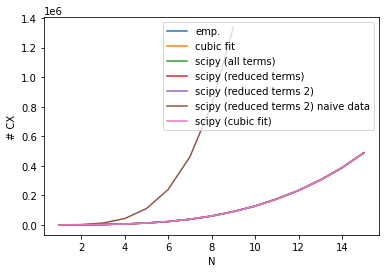

<ipython-input-171-c0aa93f29118>:80: RuntimeWarning: invalid value encountered in log2
  plt.plot(logNarray, np.log2(Narray**3*p2[3] + Narray**2*p2[2] + Narray*p2[1] + np.ones(N-1)*p2[0]), label='cubic fit')
<ipython-input-171-c0aa93f29118>:82: RuntimeWarning: invalid value encountered in log2
  plt.plot(logNarray, np.log2(f2(Narray, popt2[0], popt2[1], popt2[2], popt2[3])), label='scipy (cubic fit)')


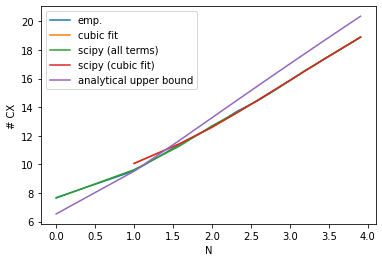

In [171]:
N=16

import scipy.optimize as so

def f(x, a, b, c, d, e, f, g, h):
    return x * (a * x**2 * np.log2(x)**2 + b * x * np.log2(x)**2 + c * x**2 * np.log2(x) + d * x**2 + e * x * np.log2(x) + f * x + g * np.log2(x) + h)

def g(x, a, b, c, d):
    return x * (a * x**2 * np.log2(x)**2 + b * x * np.log2(x)**2 + c * x**2 * np.log2(x) + d)

def g2(x, a, b, c):
    return x * (a * x**b * np.log2(x)**c)


def f2(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def f_linear(x, a, b):
    return a*x + b
    

logNarray= np.log2(Narray)
logtotal= np.log2(total)
lognaive= np.log2(cx_naive)

popt, pcov= so.curve_fit(f, Narray, total)
print('popt: ' + str(popt) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcov))) + '\n')

poptG, pcovG= so.curve_fit(g, Narray, total)
print('poptG: ' + str(poptG) + '\n')
print('stddevG: ' + str(np.sqrt(np.diag(pcovG))) + '\n')

#poptG2, pcovG2= so.curve_fit(g2, Narray, total, bounds=[[0, 1, 1], [np.inf, np.inf, np.inf]])
poptG2, pcovG2= so.curve_fit(g2, Narray, total)
print('poptG2: ' + str(poptG2) + '\n')
print('stddevG2: ' + str(np.sqrt(np.diag(pcovG2))) + '\n')

poptG2X, pcovG2X= so.curve_fit(g2, Narray[:9], cx_naive)
print('poptG2X: ' + str(poptG2X) + '\n')
print('stddevG2X: ' + str(np.sqrt(np.diag(pcovG2X))) + '\n')

popt2, pcov2= so.curve_fit(f2, Narray, total)
print('popt2: ' + str(popt2) + '\n')
print('stddev2: ' + str(np.sqrt(np.diag(pcov2))) + '\n')

popt3, pcov3= so.curve_fit(f3, Narray, total)
print('popt3: ' + str(popt3) + '\n')
print('stddev3: ' + str(np.sqrt(np.diag(pcov3))) + '\n')


poly= np.polynomial.polynomial.Polynomial.fit(Narray, total, 3, full=True)
print(poly)
#print(poly.coef)


p = np.polynomial.polynomial.Polynomial.fit(Narray, total, 3, full=False)
#plt.plot(*p.linspace())
p2= p.convert().coef
print('Cubic fit: ' + str(p2))

plt.figure()
plt.plot(Narray, total, label='emp.')
plt.plot(Narray, Narray**3*p2[3] + Narray**2*p2[2] + Narray*p2[1] + np.ones(N-1)*p2[0], label='cubic fit')
plt.plot(Narray, f(Narray, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]), label='scipy (all terms)')
plt.plot(Narray, g(Narray, poptG[0], poptG[1], poptG[2], poptG[3]), label='scipy (reduced terms)')
plt.plot(Narray, g2(Narray, poptG2[0], poptG2[1], poptG2[2]), label='scipy (reduced terms 2)')
plt.plot(Narray[:9], g2(Narray[:9], poptG2X[0], poptG2X[1], poptG2X[2]), label='scipy (reduced terms 2) naive data')
plt.plot(Narray, f2(Narray, popt2[0], popt2[1], popt2[2], popt2[3]), label='scipy (cubic fit)')
#plt.plot(Narray, f_linear(Narray, popt3[0], popt3[1]), label='scipy3')
#plt.plot(Narray, f(Narray, 72/3, 72/3, -30/3, 126/3, 24/3, 19/3, 66/3, 133/3), label='analytical upper bound')

plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()
plt.show()

plt.figure()
plt.plot(logNarray, np.log2(total), label='emp.')
plt.plot(logNarray, np.log2(Narray**3*p2[3] + Narray**2*p2[2] + Narray*p2[1] + np.ones(N-1)*p2[0]), label='cubic fit')
plt.plot(logNarray, np.log2(f(Narray, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7])), label='scipy (all terms)')
plt.plot(logNarray, np.log2(f2(Narray, popt2[0], popt2[1], popt2[2], popt2[3])), label='scipy (cubic fit)')
plt.plot(logNarray, np.log2(f(Narray, 72/3, 72/3, -30/3, 126/3, 24/3, 19/3, 66/3, 133/3)), label='analytical upper bound')

plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()
plt.show()

## Do a linear with to the logarithm vs. logarithm

popt: [3.01478583 6.89273992]

stddev: [[1.73631386 0.        ]
 [0.         2.62540281]]

popt: [3.30714933 9.49537003]

stddev: [[1.81855694 0.        ]
 [0.         3.08145583]]


popt: [3.23665153e+00 1.67667029e-19 7.34750227e+01]

stddev: [0.11624293 0.18284392 4.78341749]

popt: [3.53047408e+00 1.17092316e-14 4.88738477e+02]

stddev: [  0.6295035    0.83622609 187.88451377]



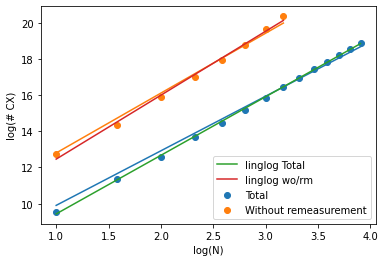

In [159]:
N=10

def linlog(x, a, b, c):
    return a*x + b*np.log2(x) + np.log2(c)


plog, _ = so.curve_fit(f_linear, logNarray, logtotal)
print('popt: ' + str(plog) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(plog))) + '\n')

plog2, _ = so.curve_fit(f_linear, logNarray[:N-1], lognaive)
print('popt: ' + str(plog2) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(plog2))) + '\n')

plogX, pcovX = so.curve_fit(linlog, logNarray[1:], logtotal[1:], bounds=[0, np.inf])
plog2X, pcov2X = so.curve_fit(linlog, logNarray[1:N-1], lognaive[1:], bounds=[0, np.inf])
print()
print('popt: ' + str(plogX) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcovX))) + '\n')
print('popt: ' + str(plog2X) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcov2X))) + '\n')


plt.scatter(logNarray[1:], logtotal[1:], label='Total')
plt.scatter(logNarray[1:N-1], lognaive[1:N-1], label='Without remeasurement')
plt.plot(logNarray[1:], f_linear(logNarray[1:], plog[0], plog[1]))
plt.plot(logNarray[1:N-1], f_linear(logNarray[1:N-1], plog2[0], plog2[1]))

plt.plot(logNarray[1:], linlog(logNarray[1:], plogX[0], plogX[1], plogX[2]), label='linglog Total')
plt.plot(logNarray[1:N-1], linlog(logNarray[1:N-1], plog2X[0], plog2X[1], plog2X[2]), label='linglog wo/rm')


plt.xlabel('log(N)')
plt.ylabel('log(# CX)')
plt.legend()

## Plot the linlog fit on raw dat

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[2.04000e+02 7.46000e+02 2.67400e+03 6.17600e+03 1.33680e+04 2.22660e+04
 3.72720e+04 5.91680e+04 9.10060e+04 1.26962e+05 1.77102e+05 2.32224e+05
 3.04722e+05 3.85016e+05 4.88428e+05]
[6.89273992e+00 5.57099615e+01 1.89151719e+02 4.50270843e+02
 8.82341608e+02 1.52880206e+03 2.43322064e+03 3.63927431e+03
 5.19073302e+03 7.13144810e+03 9.50534331e+03 1.23564076e+04
 1.57286892e+04 1.96662909e+04 2.42133656e+04]


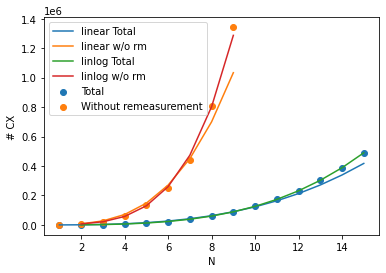

In [154]:
print(Narray)
print(total)
print(plog[1] * Narray ** plog[0])
plt.scatter(Narray, total, label='Total')
plt.scatter(Narray[:N-1], cx_naive[:N-1], label='Without remeasurement')
plt.plot(Narray, 2**plog[1] * Narray ** plog[0], label='linear Total')
plt.plot(Narray[1:N-1], 2**plog2[1] * Narray[1:N-1]**plog2[0], label='linear w/o rm')

plt.plot(Narray[1:], plogX[2] * np.log2(Narray[1:]) ** plogX[1] * Narray[1:] ** plogX[0], label='linlog Total')

N=10
plt.plot(Narray[1:N-1], plog2X[2] * np.log2(Narray[1:N-1]) ** plog2X[1] * Narray[1:N-1] ** plog2X[0], label='linlog w/o rm')


plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()

In [146]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['001'] # 1 a-fermion

shots= 10000


qps1= qps.QuantumPartonShower(2, 1)
qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))

t1= time.time()
counts= qps1.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation: %.6f\n\n' %(t2 - t1))


m= 0
k:  0

m= 1
k:  0
k:  1
generated circuit on 11 qubits
Qubits: 33
Clbits: 0
Gates: OrderedDict([('ccx', 1105), ('x', 973), ('cry', 75), ('cx', 20), ('ch', 3)])
Simulation: 1.800000




0 00 00 00 00 00 00 00 0 00 01 000 001 101 00000 0 phi f2 6
1 00 00 00 00 00 00 00 0 00 01 000 001 100 00000 0 phi f1 150
2 00 00 00 00 00 00 00 0 10 01 101 110 101 00000 f2 af1 f2 25
3 00 00 00 00 00 00 00 0 10 01 101 110 100 00000 f2 af1 f1 190
4 00 00 00 00 00 00 00 0 10 01 100 111 101 00000 f1 af2 f2 36
5 00 00 00 00 00 00 00 0 10 01 111 100 101 00000 af2 f1 f2 30
6 00 00 00 00 00 00 00 0 01 00 001 000 101 00000 phi 0 f2 73
7 00 00 00 00 00 00 00 0 10 01 110 100 101 00000 af1 f1 f2 135
8 00 00 00 00 00 00 00 0 10 01 111 101 101 00000 af2 f2 f2 37
9 00 00 00 00 00 00 00 0 00 00 000 000 100 00000 0 0 f1 1382
10 00 00 00 00 00 00 00 0 10 01 101 111 101 00000 f2 af2 f2 28
11 00 00 00 00 00 00 00 0 10 01 110 101 100 00000 af1 f2 f1 205
12 00 00 00 00 00 00 00 0 10 01 110 100 100 00000 af1 f1 f1 779
13 00 00 00 00 00 00 00 0 10 01 100 111 100 00000 f1 af2 f1 197
14 00 00 00 00 00 00 00 0 00 00 000 000 101 00000 0 0 f2 1381
15 00 00 00 00 00 00 00 0 10 01 110 101 101 00000 af1 f2 f2 24
16

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/QuantumPartonShower.py:866: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_ylabel('Probability [%]')


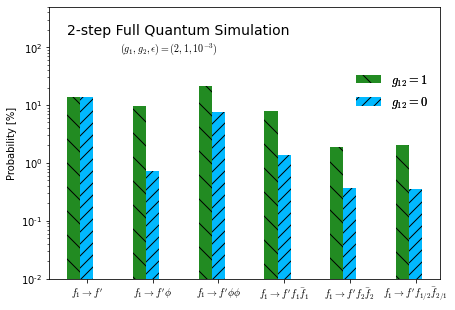

73.58
[0, 0, 0.7081, 0.2919]


In [147]:
qps1.bar_plot(counts, shots, eps, g_1, g_2, counts2= None)

In [145]:
for c in counts:
    print(c, qps1.ptype(c.split()[11]), qps1.ptype(c.split()[12]), 
          qps1.ptype(c.split()[13]), qps1.ptype(c.split()[14]), counts[c])

000 000 000 000 000 000 000 0 000 010 001 000 111 100 101 00000 0 af2 f1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 101 110 101 00000 0 f2 af1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 100 110 101 00000 0 f1 af1 f2 2
000 000 000 000 000 000 000 0 011 001 000 101 111 000 101 00000 f2 af2 0 f2 6
000 000 000 000 000 000 000 0 010 000 001 111 000 101 100 00000 af2 0 f2 f1 11
000 000 000 000 000 000 000 0 010 000 001 100 000 110 101 00000 f1 0 af1 f2 4
000 000 000 000 000 000 000 0 000 010 001 000 111 101 101 00000 0 af2 f2 f2 1
000 000 000 000 000 000 000 0 010 000 001 101 000 110 101 00000 f2 0 af1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 100 111 100 00000 0 f1 af2 f1 2
000 000 000 000 000 000 000 0 010 000 001 110 000 101 100 00000 af1 0 f2 f1 15
000 000 000 000 000 000 000 0 000 000 001 000 000 001 100 00000 0 0 phi f1 24
000 000 000 000 000 000 000 0 011 010 001 001 101 111 101 00000 phi f2 af2 f2 6
000 000 000 000 000 000 000 0 000 010 001 000 111 101 100 00

## See if we can get information about classical gates from data --> looks like no.

In [143]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            print(data[j][0], qubit)

<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe31223f6d0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe31223f700> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe31223fc70> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21850> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe311e218e0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21940> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21b80> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe311e21c10> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21c70> Qubit(QuantumRegister(3, 'w_h'), 0

<ipython-input-143-9eea645ec832>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


## Test the newest, simplified circuit with remeasurement. Using matrix_product_state simulation method, we can stimulate 4-5 steps no problem, although the simulation still uses exponential resources.

In [36]:
import QuantumPartonShower_clean as qpsc

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion
na_i= 1
nb_i= 0
#initialParticles= ['001'] # 1 a-fermion, old convention

shots= 10000
N= 4

qps2= qpsc.QuantumPartonShower(N, 1) # newest remeasurement
#qps2= qps.QuantumPartonShower(N, 1) # without remeasurement
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 1, initialParticles)
qps3= qpsc.QuantumPartonShower(N, 1) # newest remeasurement
#qps3= qps.QuantumPartonShower(N, 1) # without remeasurement
qc3, qubits3= qps3.createCircuit(eps, g_1, g_2, 0, initialParticles)

print('Qubits: ' + str(qc2.num_qubits))
print('Clbits: ' + str(qc2.num_clbits))
print('Gates: ' + str(qc2.count_ops()))

t1= time.time()
counts= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
counts2= qps3.simulate('qasm', shots=shots, position=False)
t3= time.time()

print('\nSimulation g12= 1: %.6f' %(t2 - t1))
print('Simulation g12= 0: %.6f\n\n' %(t3 - t2))

#np.save('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), counts)
#np.save('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), counts2)



m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 2


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 3


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(15, 'p'), QuantumRegister(3, 'h'), QuantumRegister(2, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(3, 'n_a'), QuantumRegister(2, 'w_a')] qubits


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 2


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 3


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on 

In [37]:
np.save('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), counts)
np.save('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), counts2)

## Generate MCMC data (emissions) and compute hardest emission analytically (log theta max) for g_12 = 0

In [93]:
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps_rhs

N= 1
qps3= qps_rhs.QuantumPartonShower(N, 1)

mcmc_shots= 10000
na_i= 1
nb_i= 0

emits= np.zeros(N+1)
for j in range(mcmc_shots):
    n_emits, n_a, n_b, n_phi= qps3.MCMC(eps, g_1, g_2, na_i, nb_i)
    emits[n_emits]+= 1
    
emits/= mcmc_shots
np.save('mcmc_%dstep_na=%d_nb=%d_shots=%d.npy' %(N, na_i, nb_i, mcmc_shots), emits)


if na_i == 1:
    gL= g_1
if nb_i == 1:
    gL= g_2

n_analytical = 10000
lnxList = [math.log(eps**((i+0.5) / n_analytical)) for i in range(0, n_analytical)]
yLList = [qps3.dsigma_d_t_max(lnx, math.log(eps), gL) for lnx in lnxList]
np.savez('thetamax_analytical_N=%d' %(N), lnxList, yLList)

print('Done.')

Done.


[0.2758 0.052  0.1092 0.2148 0.3482]
[0.1139 0.1509 0.24   0.2751 0.2201]
[0 1 2 3 4]


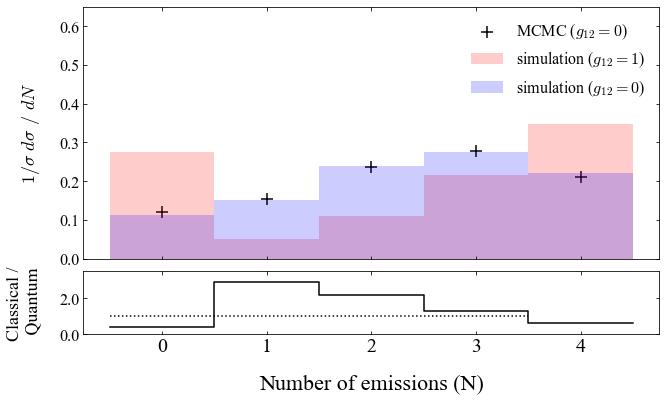

In [85]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

N= 4
shots= 10000

mcmc_shots= 10000
na_i= 1
nb_i= 0

counts= np.load('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
counts2= np.load('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
mcmc= np.load('mcmc_%dstep_na=%d_nb=%d_shots=%d.npy' %(N, na_i, nb_i, mcmc_shots))

npzfile = np.load('thetamax_analytical_N=%d.npz' %(N))
print(npzfile)
ax= npzfile['arr_0']
ay= npzfile['arr_1']

#print(mcmc)
#print(ax, ay)
#print(counts)
#print(counts2)
#qps2.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2)
#qps2.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2)
#pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False)
#pl.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2, save=False)
#pl.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.master_plot_nophisplit(g_1, g_2, N, 1, shots, counts, counts2)
#pl.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=False)
pl.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=True)
#pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=False)
#pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=True)

#np.save('', counts)
#np.save('counts_%dstep_g12=1.npy' %(N), counts)
#np.save('counts_%dstep_g12=0.npy' %(N), counts2)


#read_dictionary = np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#print(read_dictionary) # displays "world"

#cload= np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#cload2= np.load('counts_%dstep_g12=0.npy' %(N), allow_pickle='TRUE').item()
#qps2.bar_plot3(cload, shots, eps, g_1, g_2, initialParticles, counts2= cload2)

In [126]:
N= 2
L= 1

#qps2.gen_h_general(N, L, 1)
qps2.history_to_counts

<function QuantumPartonShower_clean.QuantumPartonShower.history_to_counts(hList, niList)>

In [98]:
qps2.gen_h(N, L)

[['0', '0'], ['0', '1'], ['1', '0'], ['1', '1'], ['1', '10']]

## See which qubits are being used

In [79]:
data= qc2.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j][1])
            print(data[j][0], qubit)

<ipython-input-79-261f0b1f8543>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bfb20> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf409bf3a0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bf580> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bf070> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf409bf760> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bfdc0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fd4fcd0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf3fd4f040> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fd4ffa0> Qubit(QuantumRegister(3, 'w_h'), 0

<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf2aa97730> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97580> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97580> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97970> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97a00> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97a60> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97ac0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97b20> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fdc2bb0> Qubit(QuantumRegister(3, 'w_h'), 0)


<qiskit.circuit.measure.Measure object at 0x7fcf3fa235b0> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.measure.Measure object at 0x7fcf3fa235b0> Qubit(QuantumRegister(3, 'w_h'), 2)


In [106]:
def generateParticleCounts(n_i, m, k):
    """Fill countsList with all combinations of n_phi, n_a, and n_b where each n lies in range [0, n_i+m-k],
    and the sum of all n's lies in range [n_i-k, m+n_i-k], all inclusive
    """
    countsList = []
    for numParticles in range(n_i - k, m + n_i - k + 1):
        for numPhi in range(0, n_i + m - k + 1):
            for numA in range(0, numParticles - numPhi + 1):
                numB = numParticles - numPhi - numA
                countsList.append([numPhi, numA, numB])
    return countsList

def exp_counts(m, n_i, k):
    
    if k <= n_i:
        n_i-= k
    else: 
        n_i-= k
    return (m+1) / 6 * (m**2 + 3*m*n_i + 5*m + 3*n_i**2 + 9*n_i + 6)

def exp_counts_paper(m, n_i, k):
    n_i-= k
    return (m+1) / 6 * (m**2 + 3*m*n_i + 5*m + 3*n_i**2 + 9*n_i + 6)

In [107]:
n_i= 3
N= 10
m= N - n_i
for k in range(0, N):
    print(n_i + m - k)
    pc= generateParticleCounts(n_i, m, k)
    #print(str(len(pc)) + ' -- ' + str(pc))
    print('actual: %d' %(len(pc)))
    print('exp: %d' %(exp_counts(m, n_i, k)))
    print('exp paper: %d' %(exp_counts_paper(m, n_i, k)))

10
actual: 276
exp: 276
exp paper: 276
9
actual: 216
exp: 216
exp paper: 216
8
actual: 164
exp: 164
exp paper: 164
7
actual: 120
exp: 120
exp paper: 120
6
actual: 84
exp: 84
exp paper: 84
5
actual: 56
exp: 56
exp paper: 56
4
actual: 35
exp: 36
exp paper: 36
3
actual: 20
exp: 24
exp paper: 24
2
actual: 10
exp: 20
exp paper: 20
1
actual: 4
exp: 24
exp paper: 24


# Hardcoded 2-step simulation with re-measurement

In [8]:
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps_rhs2


eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion
#initialParticles= ['001'] # 1 a-fermion, old convention

shots= 10000
N= 1

#qpsS= qps_rhs2.QuantumPartonShower(N, 1)


#na_i= 1
#nb_i= 0

#qpsS.MCMC(eps, g_1, g_2, na_i, nb_i, verbose= True)

In [10]:
qpsS= qps_rhs2.QuantumPartonShower(N, 1)
qps2S= qps_rhs2.QuantumPartonShower(N, 1)

qcS, qubitsS= qpsS.createCircuit(eps, g_1, g_2, 1, initialParticles)
qc2S, qubits2S= qps2S.createCircuit(eps, g_1, g_2, 0, initialParticles)

qcT= compiler.transpile(qcS, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)
    
print('Qubits: ' + str(qcS.num_qubits))
#print('Clbits: ' + str(qc.num_bits))
print('Gates: ' + str(qcS.count_ops()))
print('Transpiled Gates: ' + str(qcT.count_ops()))

t1= time.time()
counts= qpsS.simulate('qasm', shots=shots)
t2= time.time()
counts2= qps2S.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 1: ' + str(t2-t1))
print('Time to simulate withg g12= 0: ' + str(t3-t2))



g_a= 2.6180, g_b= 0.3820, u= 0.5257
Delta_aList: [0.02310487841255638]
Delta_bList: [0.9229313751223984]
Delta_phiList: [0.021324217205336473]
P_aList: [-1.8838557485302034]
P_bList: [-0.0401001985282944]
P_phiList: [-1.923955947058498]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.02310487841255638
	 DeltaB: 0.9229313751223984
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


g_a= 2.0000, g_b= 1.0000, u= 0.0000
Delta_aList: [0.11093544797188865]
Delta_bList: [0.5771219406658367]
Delta_phiList: [0.06402328102217032]
P_aList: [-1.0994033983191416]
P_bList: [-0.2748508495797854]
P_phiList: [-1.374254247898927]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.11093544797188865
	 DeltaB: 0.5771219406658367
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
Qubits: 9
Gates: OrderedDict([('x', 5), ('measure', 3), ('reset', 3), ('cu3', 2), ('cry', 2), ('ry', 1)])
Trans